## Do some plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("video_ids_from_news_politics.csv")
df.head()

,display_id
0,MBgzne7djFU
1,AbH3pJnFgY8
2,QBuwj_h1SH4
3,Reogq26-KpI
4,uBY9OtlSnX8


In [5]:
dfv = pd.read_csv("clustered_videos_info.csv")
dfv.head()

,channel_id,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,UCzUV5283-l5c0oKRtyenj6Q,195.0,MBgzne7djFU,378,47027.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-10-03 00:00:00,374711.0
1,UCzUV5283-l5c0oKRtyenj6Q,114.0,AbH3pJnFgY8,278,36384.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-10-02 00:00:00,245617.0
2,UCzUV5283-l5c0oKRtyenj6Q,143.0,QBuwj_h1SH4,385,40597.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-10-01 00:00:00,299535.0
3,UCzUV5283-l5c0oKRtyenj6Q,193.0,Reogq26-KpI,419,42658.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-09-30 00:00:00,357126.0
4,UCzUV5283-l5c0oKRtyenj6Q,136.0,uBY9OtlSnX8,414,44246.0,"Funny,Entertainment,Laughing,Educational,Learn...",2019-09-27 00:00:00,297704.0


In [15]:
dfv[dfv["upload_date"] == "2019-10-03 00:00:00"].count()

channel_id       35
dislike_count    35
display_id       35
duration         35
like_count       35
tags             34
upload_date      35
view_count       35
dtype: int64

In [22]:
dfv["year"] = pd.to_datetime(dfv["upload_date"]).dt.year
dfv.head()

,channel_id,dislike_count,display_id,duration,like_count,tags,upload_date,view_count,year
0,UCzUV5283-l5c0oKRtyenj6Q,195.0,MBgzne7djFU,378,47027.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-10-03 00:00:00,374711.0,2019
1,UCzUV5283-l5c0oKRtyenj6Q,114.0,AbH3pJnFgY8,278,36384.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-10-02 00:00:00,245617.0,2019
2,UCzUV5283-l5c0oKRtyenj6Q,143.0,QBuwj_h1SH4,385,40597.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-10-01 00:00:00,299535.0,2019
3,UCzUV5283-l5c0oKRtyenj6Q,193.0,Reogq26-KpI,419,42658.0,"Funny,Entertainment,Fun,Laughing,Educational,L...",2019-09-30 00:00:00,357126.0,2019
4,UCzUV5283-l5c0oKRtyenj6Q,136.0,uBY9OtlSnX8,414,44246.0,"Funny,Entertainment,Laughing,Educational,Learn...",2019-09-27 00:00:00,297704.0,2019


In [29]:
dfvg = dfv.groupby(["year"]).count()
dfvg.head(20)

,channel_id,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
year,,,,,,,,
2007,1,1,1,1,1,1,1,1
2008,7,7,7,7,7,7,7,7
2009,81,79,81,81,79,81,81,81
2010,124,122,124,124,122,123,124,124
2011,234,234,234,234,234,234,234,234
2012,639,638,639,639,638,636,639,639
2013,1430,1428,1430,1430,1428,1401,1430,1430
2014,6108,6108,6108,6108,6108,6057,6108,6108
2015,11454,11426,11454,11454,11426,11343,11454,11454


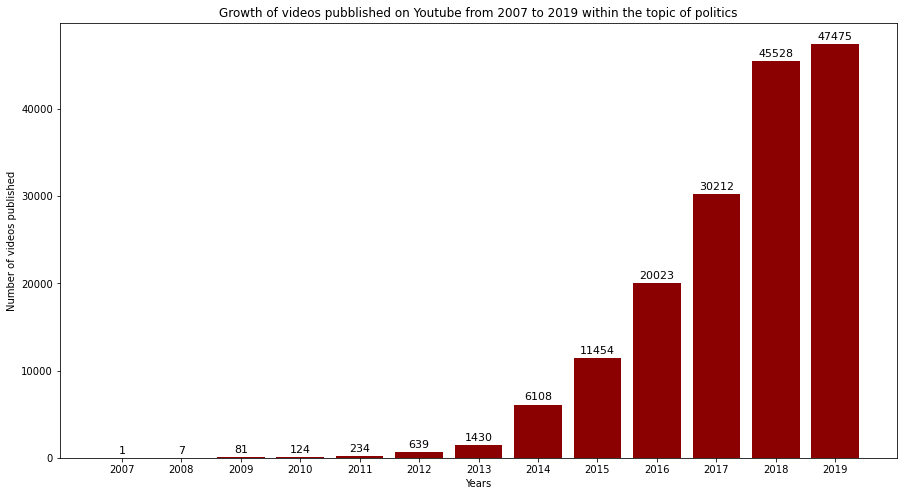

In [95]:
        
plt.figure(figsize = (15, 8))

fig = plt.bar(dfvg.index, dfvg["view_count"], color="darkred")

plt.xticks(dfvg.index)

for i, v in enumerate(dfvg["view_count"]):
    plt.text(dfvg.index[i], v + 500, str(v), fontsize=11, horizontalalignment="center")

plt.xlabel("Years")
plt.ylabel("Number of videos published")
plt.title("Growth of videos pubblished on Youtube from 2007 to 2019 within the topic of politics")

plt.show()

In [21]:
import chart_studio
import plotly.express as px
import chart_studio.plotly as py

In [18]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 1.0 MB/s eta 0:00:01


In [17]:
total_videos = [2.3, 1.2, 3.8, 12.3, 2.4, 13.7, 4.0, 8.3, 8.9, 0.8, 6.9, 0.6, 2.4, 4.4, 1.1]
topics = ["Autos & Vehic", "Comedy", "Education", "Entertainment", "Film % Anime", "Gaming", "Howto & Style", "Music", "News & Politics", "Nonprofits", "People & Blogs", "Pets & Animals", "Science & Tech", "Sports", "Travel & Events"]

df = pd.DataFrame({"topics": topics, "videos": total_videos})

plt.figure(figsize = (19, 9))


fig = px.pie(df, values='videos', names='topics',
             title='Disribution of the categories',
             hover_data=['videos'], labels={'videos':'videos in milion'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


# plt.figure(figsize = (15, 8))
# plt.pie(total_videos, labels=topics, startangle=90)
# plt.axis('equal') 
# plt.show()

<Figure size 1368x648 with 0 Axes>

In [22]:
username = 'maximre' # your username
api_key = 'ivH8PuTlT8yz6qWpLsi0' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [23]:
py.plot(fig, filename = 'test', auto_open=True)

'https://plotly.com/~maximre/1/'